In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("Social_Network_Ads.csv")

In [34]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [35]:
df = df.iloc[:, 2:]

In [36]:
df.sample(5)

,Age,EstimatedSalary,Purchased
386,49,39000,1
114,42,80000,0
121,37,72000,0
322,41,52000,0
160,32,100000,1


# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state = 0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test set
X_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [39]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [40]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [41]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(x_test_scaled, columns = X_test.columns)

In [43]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [85]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [44]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [45]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effects of Scaling

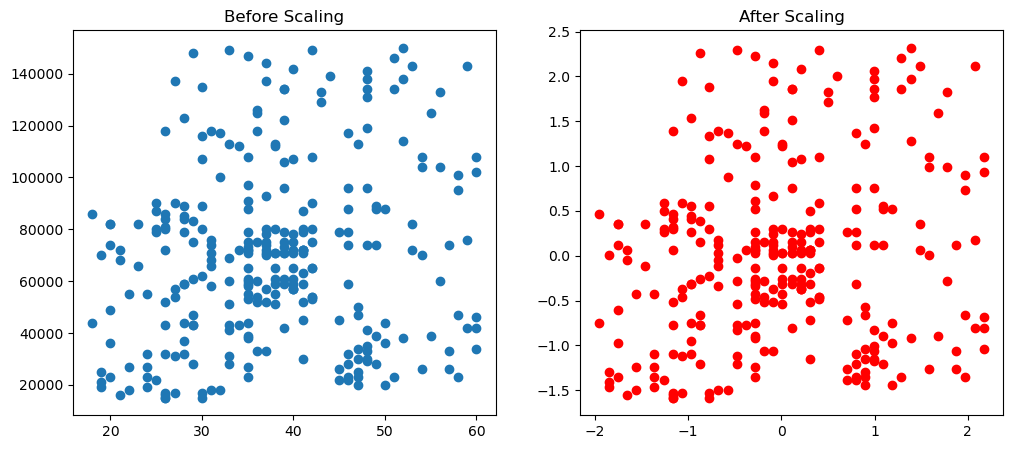

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(data = X_train, x = "Age", y = "EstimatedSalary")
ax1.set_title("Before Scaling")
ax2.scatter(data = X_train_scaled, x = "Age", y = "EstimatedSalary", c = 'r')
ax2.set_title("After Scaling")
plt.show()

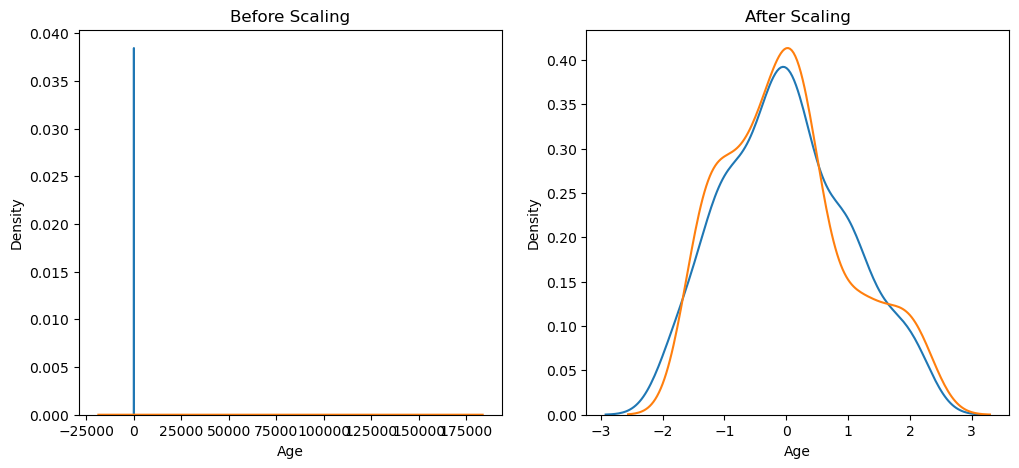

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Comparison of Distribution

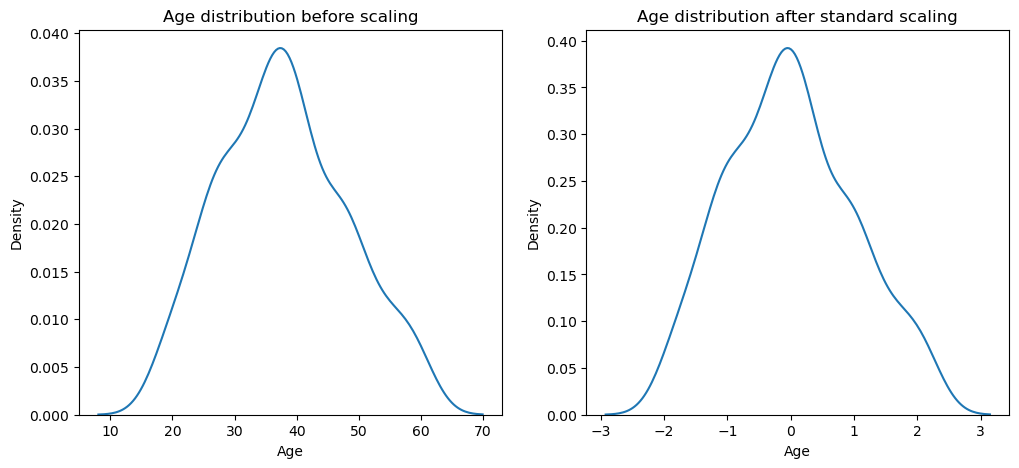

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title("Age distribution before scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

# after scaling
ax2.set_title("Age distribution after standard scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

plt.show()

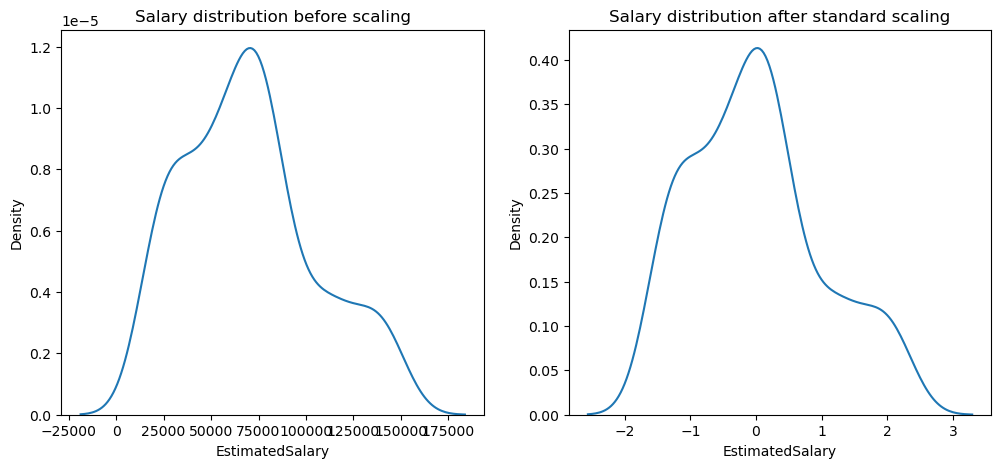

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title("Salary distribution before scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title("Salary distribution after standard scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Why scaling is important ?

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [52]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
print(f"Actual {accuracy_score(y_test, y_pred)}")
print(f"Scaled: {accuracy_score(y_test, y_pred_scaled)}")

Actual 0.875
Scaled: 0.8666666666666667


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [60]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [61]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [62]:
print(f"Actual {accuracy_score(y_test, y_pred)}")
print(f"Scaled: {accuracy_score(y_test, y_pred_scaled)}")

Actual 0.875
Scaled: 0.875


In [63]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outliers

In [76]:
new_data = pd.DataFrame({"Age": [5, 90, 95], 'EstimatedSalary': [1000, 2500000, 3500000], 'Purchased': [0, 1, 1]})
df = pd.concat([df, new_data], ignore_index=True)

In [82]:
df = df.drop_duplicates()

In [83]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,2500000,1


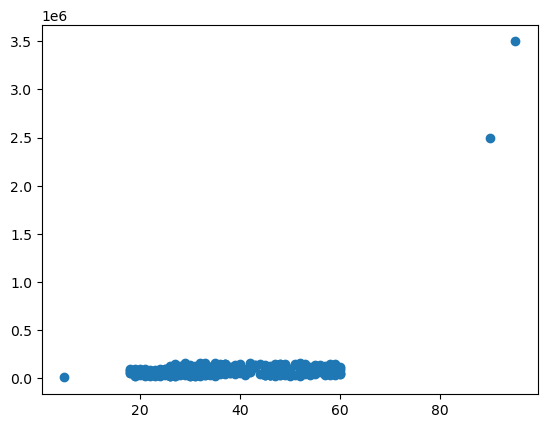

In [84]:
plt.scatter(data = df, x = "Age", y = "EstimatedSalary")
plt.show()

In [86]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [87]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [89]:
print(f"Actual {accuracy_score(y_test, y_pred)}")
print(f"Scaled: {accuracy_score(y_test, y_pred_scaled)}")

Actual 0.875
Scaled: 0.6583333333333333


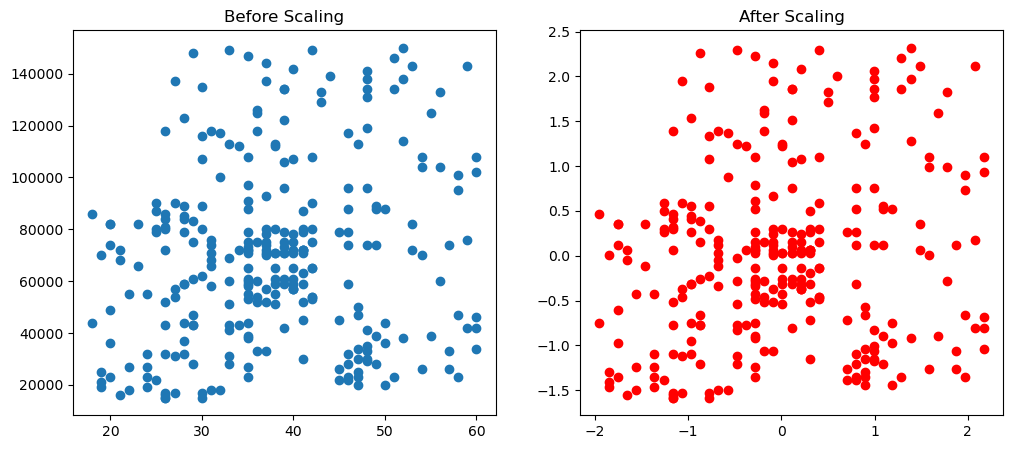

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(data = X_train, x = "Age", y = "EstimatedSalary")
ax1.set_title("Before Scaling")
ax2.scatter(data = X_train_scaled, x = "Age", y = "EstimatedSalary", c = 'r')
ax2.set_title("After Scaling")
plt.show()